# Content List: 

## 1. Importing libraries and files:
   - Importing pandas as pd
   - Importing numpy as np
   - Importing seaborn as sns
   - Importing matplotlib.pyplot as plt
   - Importing os
   - Importing folium
   - Importing json

## 2. Reading and preprocessing data:
   - Reading the CSV file and storing it in the 'df' variable
   - Converting the 'CrashHour' column to float64 data type
   - Checking for missing values in the dataset
   - Creating a dictionary to map month names to numeric codes
   - Mapping the 'CrashMonth' column to numeric codes using the dictionary

## 3. Exploratory data analysis (EDA):
   - Generating histograms for each numeric variable using seaborn's `histplot()`
   - Plotting a choropleth map to visualize the mean 'BikeAge', 'DrvrAge', 'CrashHour', and mode of 'MonthCode' by county using folium

## 4. Analysis and insights:
   - Observing the absence of extreme values in the variables
   - Verifying the hypothesis that young drivers are more involved in crashes
   - Posing a new question regarding the most common categorical value for younger drivers in the crashes

## 1. Importing libraries and files:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

## 2. Reading and preprocessing data:

In [2]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Original Data\NC-37-north-carolina-counties.json'

In [3]:
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Prepared Data\NCDOT_BikePedCrash.csv'  # Corrected file path

In [4]:
df = pd.read_csv(file_path)

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [6]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Original Data\NC-37-north-carolina-counties.json'

In [7]:


# Open the JSON file
with open(r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Original Data\NC-37-north-carolina-counties.json') as f:
    try:
        # Load the JSON data
        data = json.load(f)
        
        # Print the entire data dictionary
        print(data)
        
        # Iterate through the 'features' list if it exists
        if 'features' in data:
            for feature in data['features']:
                print(feature)
        else:
            print("'features' key not found in the JSON data.")
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", str(e))


{'type': 'Topology', 'transform': {'scale': [0.001767029435151502, 0.0012458489392130092], 'translate': [-84.32207678621752, 33.85088968641204]}, 'arcs': [[[1166, 1237], [62, 12], [104, -120], [-1, -56]], [[1331, 1073], [-40, 2], [-5, 0], [-95, 3], [-44, 1], [-33, 3]], [[1114, 1082], [-3, 36], [55, 119]], [[2431, 2160], [77, 0], [99, 0], [115, -1]], [[2722, 2159], [-12, -233]], [[2710, 1926], [0, -7]], [[2710, 1919], [-284, 12]], [[2426, 1931], [5, 229]], [[1952, 1915], [70, 22], [55, -9], [59, 26], [54, -35]], [[2190, 1919], [12, -18], [-5, -67], [-43, -35], [11, -37]], [[2165, 1762], [-111, 4]], [[2054, 1766], [-107, 4]], [[1947, 1770], [5, 145]], [[3740, 353], [-28, -36], [-37, -67], [-39, -120]], [[3636, 130], [-33, 146], [0, 36], [-42, 74]], [[3561, 386], [21, 4], [3, 29], [93, 13], [48, -77], [14, -2]], [[2934, 2160], [111, 0], [82, 0]], [[3127, 2160], [-2, -186], [-1, -60]], [[3124, 1914], [-84, 3]], [[3040, 1917], [-115, 2]], [[2925, 1919], [9, 241]], [[2404, 1038], [126, 32], 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AmbulanceR          11044 non-null  object 
 1   BikeAge             11044 non-null  float64
 2   BikeAlcFlg          11044 non-null  object 
 3   BikeDir             11044 non-null  object 
 4   BikeInjury          11044 non-null  object 
 5   BikeSex             11044 non-null  object 
 6   City                11044 non-null  object 
 7   County              11044 non-null  object 
 8   CrashAlcoh          11044 non-null  object 
 9   CrashDay            11044 non-null  object 
 10  CrashGrp            11044 non-null  object 
 11  CrashHour           11044 non-null  float64
 12  CrashMonth          11044 non-null  object 
 13  CrashType           11044 non-null  object 
 14  CrashYear           11044 non-null  int64  
 15  DrvrAge             11044 non-null  float64
 16  Drvr

In [9]:
df['CrashHour'] = df['CrashHour'].astype('float64')

In [10]:
df.head()

,AmbulanceR,BikeAge,BikeAlcFlg,BikeDir,BikeInjury,BikeSex,City,County,CrashAlcoh,CrashDay,...,Latitude,Longitude,RdConditio,SpeedLimit,TraffCntrl,Weather,Workzone,DrvrAgeImputedFlag,BikeAgeImputedFlag,MonthCode
0,Yes,11.0,No,With Traffic,B: Suspected Minor Injury,Male,Durham,Durham,No,Tuesday,...,36.039490,-78.883896,Dry,30 - 35 MPH,No Control Present,Clear,No,0,0,1
1,Yes,20.0,No,Facing Traffic,C: Possible Injury,Male,Cary,Wake,No,Friday,...,35.751118,-78.782800,Dry,30 - 35 MPH,Stop And Go Signal,Clear,No,0,0,1
2,Yes,37.0,No,Unknown,B: Suspected Minor Injury,Male,Stallings,Union,No,Monday,...,35.084732,-80.697820,Dry,20 - 25 MPH,No Control Present,Cloudy,No,0,0,1
3,Yes,30.0,No,With Traffic,C: Possible Injury,Male,Salisbury,Rowan,No,Friday,...,35.684400,-80.479320,Dry,30 - 35 MPH,No Control Present,Cloudy,No,1,0,1
4,Yes,45.0,No,With Traffic,B: Suspected Minor Injury,Male,Fayetteville,Cumberland,No,Friday,...,34.999428,-78.904450,Dry,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,0,0,1


Consistency Checks

In [11]:
# Check for missing values

df.isnull().sum()

AmbulanceR            0
BikeAge               0
BikeAlcFlg            0
BikeDir               0
BikeInjury            0
BikeSex               0
City                  0
County                0
CrashAlcoh            0
CrashDay              0
CrashGrp              0
CrashHour             0
CrashMonth            0
CrashType             0
CrashYear             0
DrvrAge               0
DrvrAlcFlg            0
DrvrInjury            0
DrvrSex               0
DrvrVehTyp            0
HitRun                0
Latitude              0
Longitude             0
RdConditio            0
SpeedLimit            0
TraffCntrl            0
Weather               0
Workzone              0
DrvrAgeImputedFlag    0
BikeAgeImputedFlag    0
MonthCode             0
dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape #no dups

(11044,)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AmbulanceR          11044 non-null  object 
 1   BikeAge             11044 non-null  float64
 2   BikeAlcFlg          11044 non-null  object 
 3   BikeDir             11044 non-null  object 
 4   BikeInjury          11044 non-null  object 
 5   BikeSex             11044 non-null  object 
 6   City                11044 non-null  object 
 7   County              11044 non-null  object 
 8   CrashAlcoh          11044 non-null  object 
 9   CrashDay            11044 non-null  object 
 10  CrashGrp            11044 non-null  object 
 11  CrashHour           11044 non-null  float64
 12  CrashMonth          11044 non-null  object 
 13  CrashType           11044 non-null  object 
 14  CrashYear           11044 non-null  int64  
 15  DrvrAge             11044 non-null  float64
 16  Drvr

In [15]:
month_codes = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['MonthCode'] = df['CrashMonth'].map(month_codes)


## 3. Exploratory data analysis (EDA):

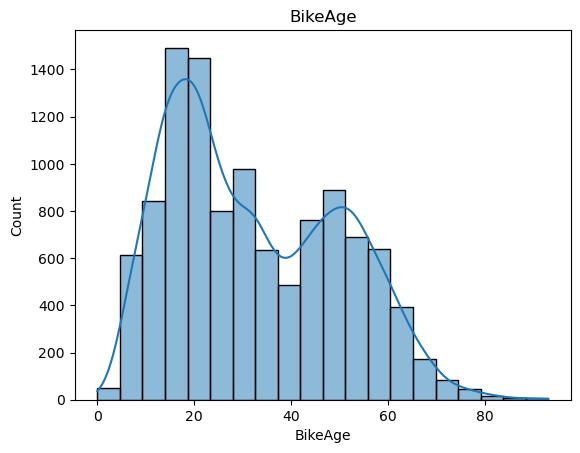

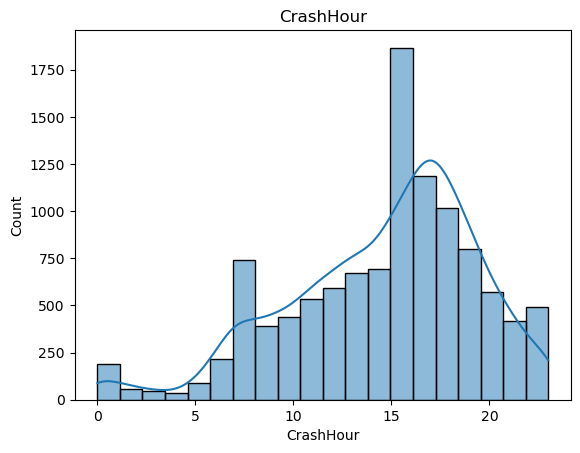

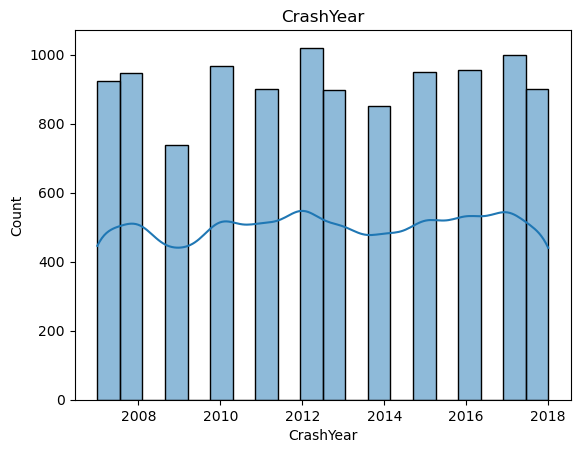

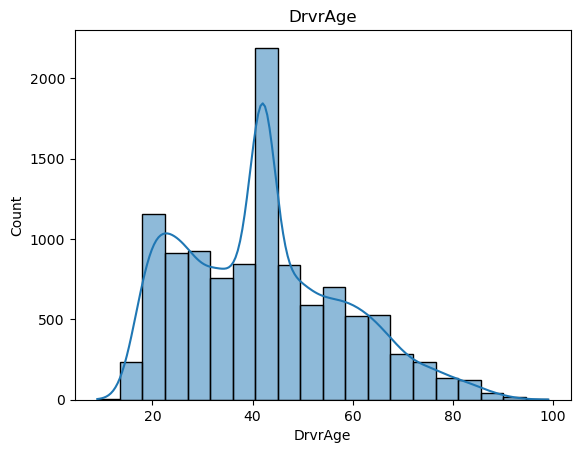

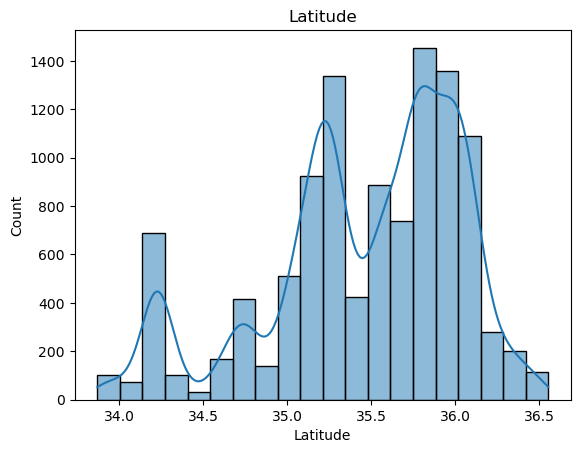

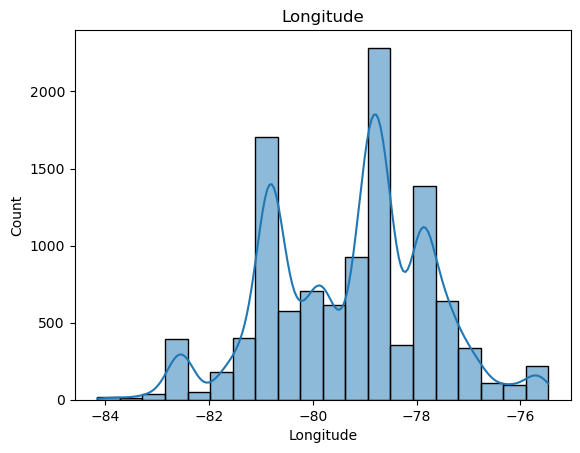

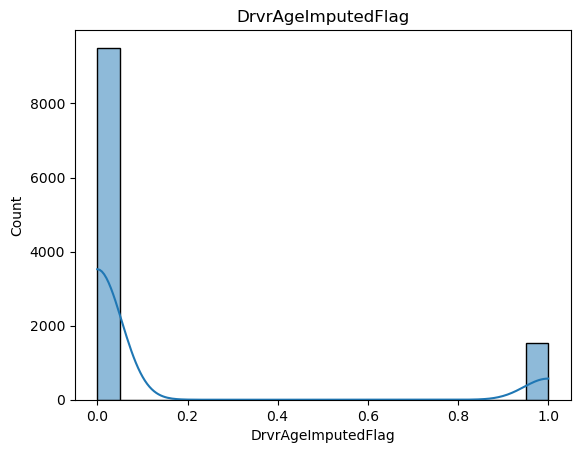

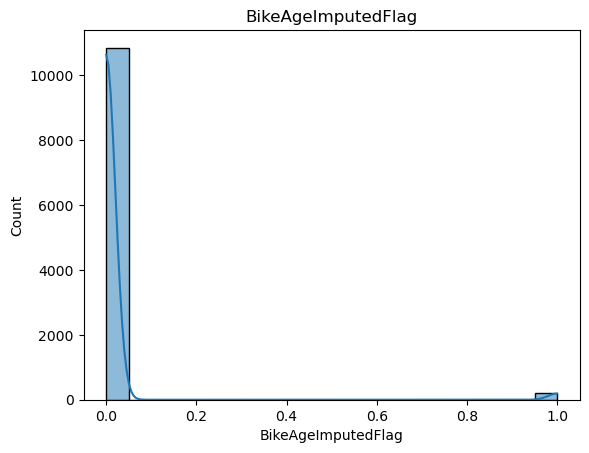

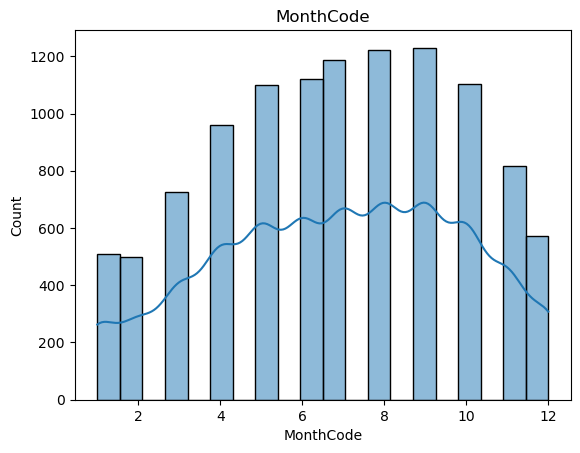

In [16]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt

# Generate histograms for each numeric variable
for column in numeric_columns:
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
    plt.show()

Seems there aren't any extreme values for the variables

    #Plotting a Choropleth

In [17]:
import statistics

# Define a custom aggregation function to calculate the mode
def mode_agg(x):
    try:
        return statistics.mode(x)
    except statistics.StatisticsError:
        return None

# Create a data frame with the desired aggregations
data_to_plot = df.groupby('County').agg({'CrashHour': 'mean', 'BikeAge': 'mean', 'DrvrAge': 'mean', 'MonthCode': mode_agg}).reset_index()
data_to_plot.head()


,County,CrashHour,BikeAge,DrvrAge,MonthCode
0,Alamance,15.827869,28.360656,44.448304,8
1,Alexander,18.333333,26.000000,42.000000,2
2,Alleghany,8.000000,62.000000,37.000000,7
3,Anson,13.800000,30.800000,50.407701,11
4,Ashe,14.800000,30.000000,44.807701,4


In [18]:
unique_cities = df['County'].unique()
print(unique_cities)

['Durham' 'Wake' 'Union' 'Rowan' 'Cumberland' 'Randolph' 'Carteret'
 'Caldwell' 'Johnston' 'Mecklenburg' 'Davie' 'Robeson' 'Gaston' 'Forsyth'
 'Alamance' 'Lincoln' 'Iredell' 'Orange' 'Pitt' 'New Hanover' 'Cleveland'
 'Buncombe' 'Onslow' 'Davidson' 'Lenoir' 'Jones' 'Beaufort' 'Rockingham'
 'Burke' 'Craven' 'Sampson' 'Wilson' 'Ashe' 'Mcdowell' 'Nash' 'Columbus'
 'Cabarrus' 'Stanly' 'Duplin' 'Wayne' 'Guilford' 'Halifax' 'Madison'
 'Anson' 'Henderson' 'Yadkin' 'Wilkes' 'Dare' 'Lee' 'Moore' 'Scotland'
 'Hoke' 'Richmond' 'Chatham' 'Granville' 'Brunswick' 'Pasquotank' 'Vance'
 'Pender' 'Edgecombe' 'Clay' 'Surry' 'Harnett' 'Montgomery' 'Currituck'
 'Hyde' 'Catawba' 'Hertford' 'Polk' 'Graham' 'Person' 'Washington'
 'Caswell' 'Pamlico' 'Northampton' 'Martin' 'Franklin' 'Jackson' 'Tyrrell'
 'Transylvania' 'Watauga' 'Macon' 'Haywood' 'Camden' 'Rutherford' 'Bertie'
 'Stokes' 'Swain' 'Chowan' 'Greene' 'Cherokee' 'Yancey' 'Perquimans'
 'Bladen' 'Alexander' 'Avery' 'Warren' 'Gates' 'Alleghany' 'Mitche

In [19]:
with open(country_geo) as f:
    country_geo = json.load(f)

## 4. Analysis and insights:

In [20]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
geo_data = country_geo,
topojson='objects.cb_2015_north_carolina_county_20m', # Add this
data = data_to_plot,
columns = ['County','BikeAge'],
key_on = 'feature.properties.NAME', # corrected the key

fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
legend_name = "Free/Reduced Price Eligibility Quantity").add_to(map)

folium.LayerControl().add_to(map)
map



In [21]:
map = folium.Map(location = [100, 0], zoom_start = 0)

folium.Choropleth(
geo_data = country_geo,
topojson='objects.cb_2015_north_carolina_county_20m', # Add this
data = data_to_plot,
columns = ['County','DrvrAge'],
key_on = 'feature.properties.NAME', # corrected the key

fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
legend_name = "Free/Reduced Price Eligibility Quantity").add_to(map)

folium.LayerControl().add_to(map)
map



In [22]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
geo_data = country_geo,
topojson='objects.cb_2015_north_carolina_county_20m', # Add this
data = data_to_plot,
columns = ['County','CrashHour'],
key_on = 'feature.properties.NAME', # corrected the key

fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
legend_name = "Free/Reduced Price Eligibility Quantity").add_to(map)

folium.LayerControl().add_to(map)
map

In [23]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
geo_data = country_geo,
topojson='objects.cb_2015_north_carolina_county_20m', # Add this
data = data_to_plot,
columns = ['County','MonthCode'],
key_on = 'feature.properties.NAME', # corrected the key

fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
legend_name = "Free/Reduced Price Eligibility Quantity").add_to(map)

folium.LayerControl().add_to(map)
map

This proves my hypothesis that young drivers are more dangerous and at risk than older ones. New question I have from these new maps is, whats the categorical value that pops up the most from the younger drivers in these crashes for those variables? 